# August 2015 
# Author: Federica B Bianco, NYU @fedhere
# prepared for PUI 2015 CUSP, NYU

## demonstration of how many distributions including Poisson, Binomial, Chisq, resamble a  Gaussian distribution when the parameters are above some threshold

also see http://individual.utoronto.ca/zheli/poisson.pdf  for a description of Poisson stochastic processes and a derivation of the Poisson distribution from the Bernoulli probability

In [1]:
import os
import sys
import numpy as np
import pylab as pl

from IPython.core.display import HTML
import json
s = json.load(open("../fbb_matplotlibrc.json") )
pl.rcParams.update(s)

pl.rcParams['axes.labelsize'] = 20
pl.rcParams['axes.grid'] = False
%pylab inline



Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Poisson distribution: $k=\frac{\lambda^k}{k!} e^{-\lambda}$

* what are the parameters in this formula?
* why do i use k (and not x)
* what is the *support* of the Poisson distribution?

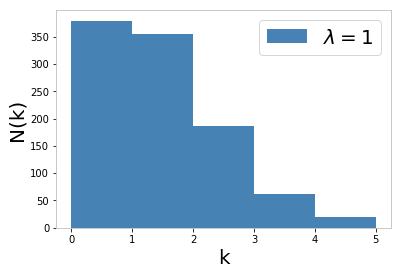

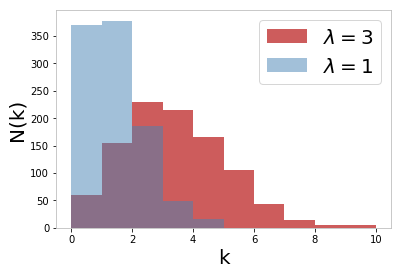

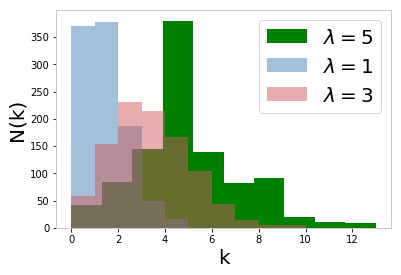

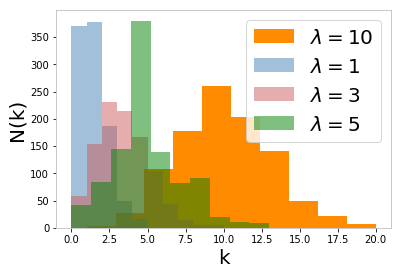

In [12]:
np.random.seed(999)

pl.figure()
p1=np.random.poisson(1, 1000)
pl.hist(np.random.poisson(1, 1000), bins=5, color='steelBlue', label=r'$\lambda=1$', histtype='stepfilled')
pl.legend(fontsize=20)
pl.xlabel('k')
pl.ylabel('N(k)')

pl.figure()
p3=np.random.poisson(3, 1000)
pl.hist(p3, color='IndianRed', label=r'$\lambda=3$', histtype='stepfilled')
pl.hist(p1, bins=5, color='steelBlue', alpha=0.5, label=r'$\lambda=1$', histtype='stepfilled')
pl.legend(fontsize=20)
pl.xlabel('k')
pl.ylabel('N(k)')

pl.figure()
p5=np.random.poisson(5, 1000)
pl.hist(p5,  color='Green',label=r'$\lambda=5$', histtype='stepfilled')
pl.hist(p1, bins=5, color='steelBlue', alpha=0.5, label=r'$\lambda=1$', histtype='stepfilled')
pl.hist(p3, color='IndianRed', alpha=0.5, label=r'$\lambda=3$', histtype='stepfilled')
pl.legend(fontsize=20)
pl.xlabel('k')
pl.ylabel('N(k)')

pl.figure()
p10=np.random.poisson(10, 1000)
pl.hist(p10 , color='DarkOrange', label=r'$\lambda=10$', histtype='stepfilled')
pl.hist(p1, bins=5, color='steelBlue', alpha=0.5, label=r'$\lambda=1$', histtype='stepfilled')
pl.hist(p3, color='IndianRed', alpha=0.5, label=r'$\lambda=3$', histtype='stepfilled')
pl.hist(p5,  color='Green', alpha=0.5, label=r'$\lambda=5$', histtype='stepfilled')
pl.xlabel('k')
pl.ylabel('N(k)')
pl.legend(fontsize=20)

pl.show()

# Gaussian (Normal) distribution: $x= \frac{1}{\sigma\sqrt{2\pi}}\, e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$

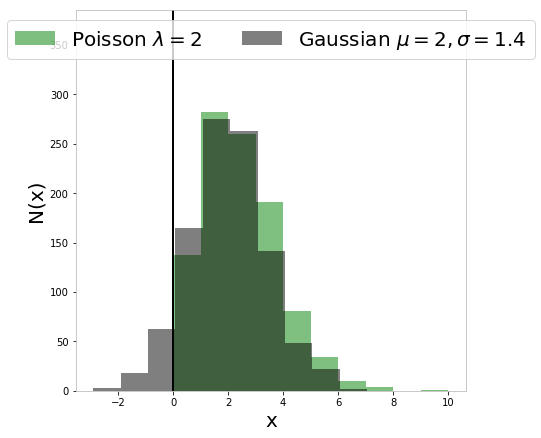

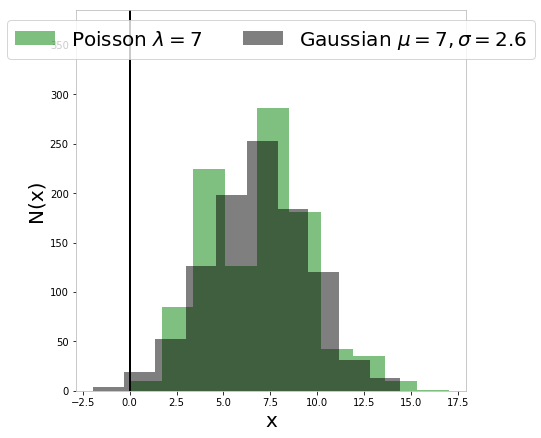

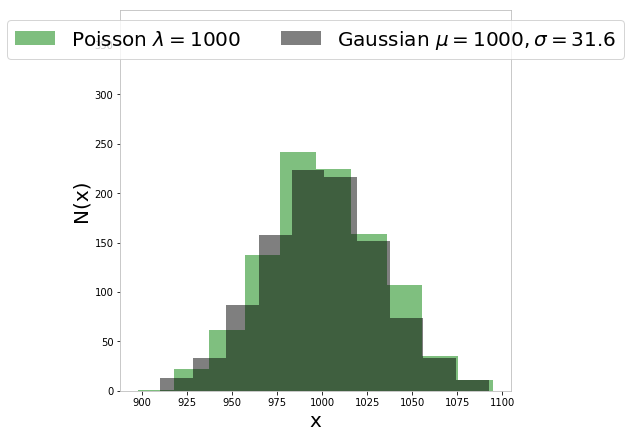

In [13]:
N=1000

for l in [2, 7, 1000]:
    pl.figure(figsize=(7, 7))
    pl.hist(np.random.poisson(l,N),color='Green', alpha=0.5, label=r'Poisson $\lambda=%g$'%l)
    pl.hist(np.random.normal(l, np.sqrt(l), N), color='black', alpha=0.5, label=r'Gaussian $\mu=%g,\sigma=%.1f$'%(l, np.sqrt(l)))
    if l==2:
        pl.ylim(pl.ylim()[0], pl.ylim()[1] * 1.3)
        ylim=pl.ylim()
    pl.ylim(ylim)
    if not l==1000:
        pl.plot([0,0], ylim, 'k-')
    pl.legend(fontsize=20, ncol=2, loc=9)
    pl.xlabel('x')
    pl.ylabel('N(x)')



# Binomial distribution: $k=\textstyle {n \choose k}\, p^k (1-p)^{n-k}$
number of successes in a sequence of n independent yes/no (Bernulli) experiments, each of which yields success with probability p

if np>=5 and n(1-p)>5 the Binomial distribution approximates a Normal distribution

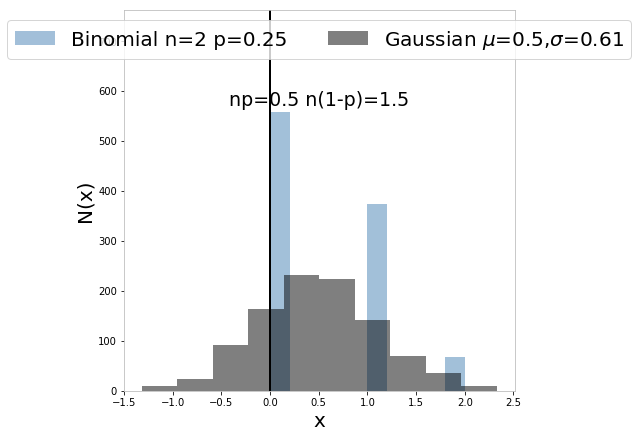

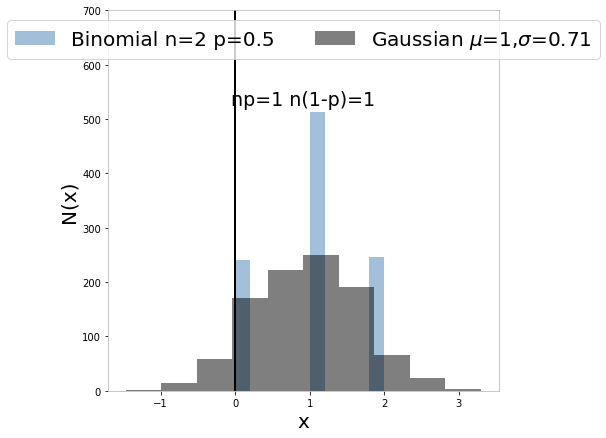

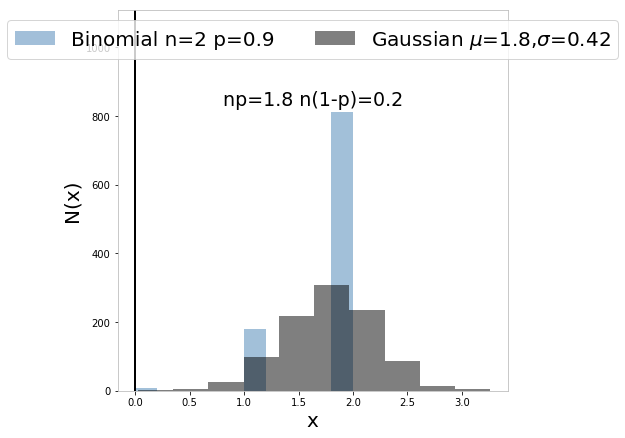

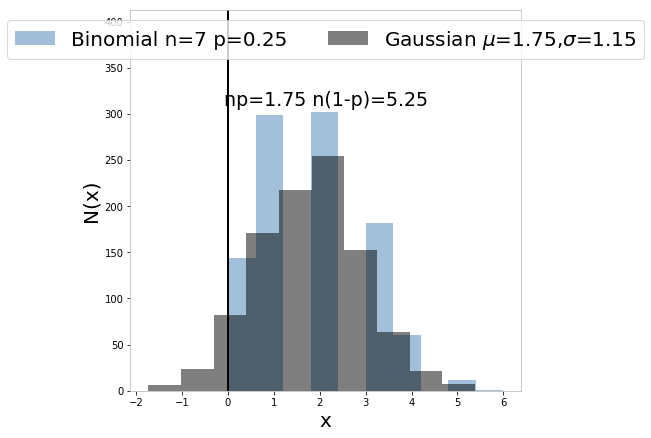

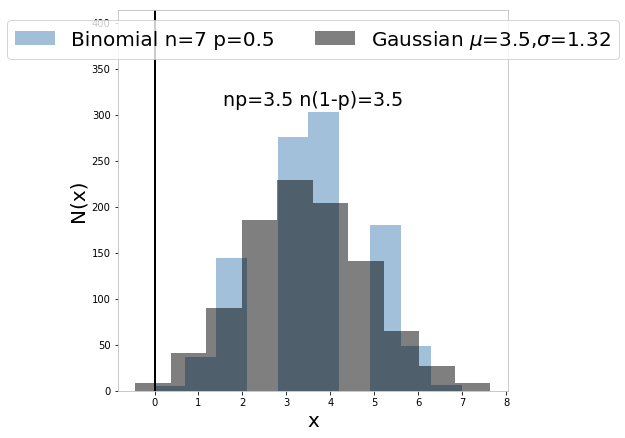

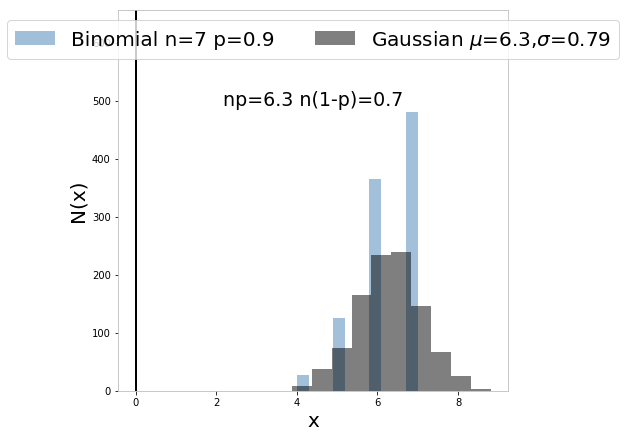

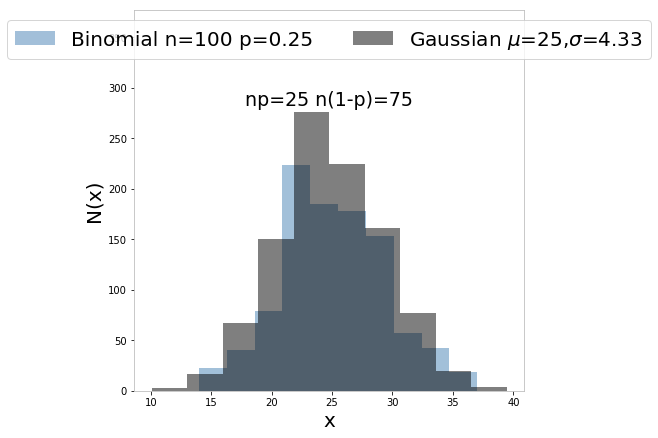

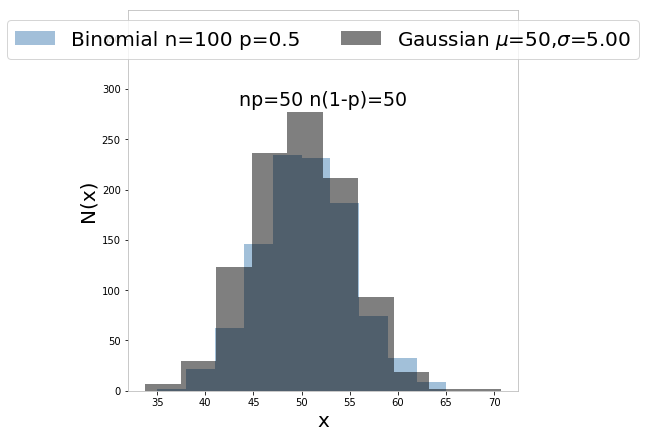

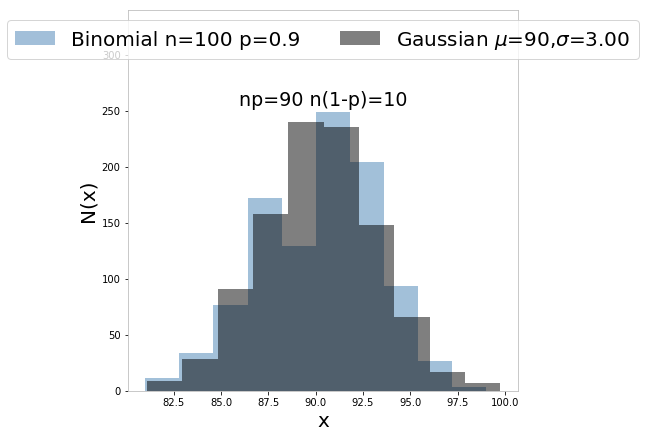

In [14]:
for n in [2.,7.,100.]:
    for p in [0.25,0.5,0.9]:
        
        fig=pl.figure(figsize=(7,7))
        ax=fig.add_subplot(111)
        ax.hist(np.random.binomial(n,p,size=N),color='SteelBlue', alpha = 0.5, label=r'Binomial n=%g p=%g'%(n,p))
        ax.hist(np.random.normal(n*p,np.sqrt(n*p*(1-p)),N), color='black', alpha = 0.5, label=r'Gaussian $\mu$=%g,$\sigma$=%.2f'%(n*p, np.sqrt(n*p*(1-p))))
        #if n==2:
        ax.set_ylim(ax.get_ylim()[0],ax.get_ylim()[1]*1.3)
        if not n==100:
            ax.plot([0,0],ax.get_ylim(),'k-')
        ax.text(0.5, 0.75, "np=%g n(1-p)=%g"%(n*p,n*(1-p)), horizontalalignment='center', transform=ax.transAxes, fontsize=19)
        ax.legend(fontsize=20, ncol=2, loc=9)
        ax.set_xlabel('x')
        ax.set_ylabel('N(x)')

# Chi square distribution: $x=\frac{1}{2^{\frac{k}{2}}\Gamma\left(\frac{k}{2}\right)}\; x^{\frac{k}{2}-1} e^{-\frac{x}{2}}$

k is the number of degrees of freedom. the $\chi ^2$ distribution is the distribution of a sum of the squares of k independent standard normal random variables.

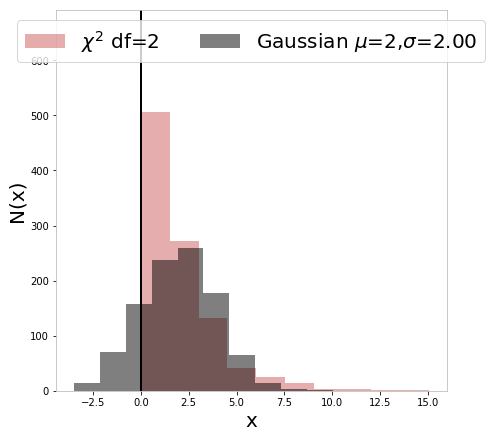

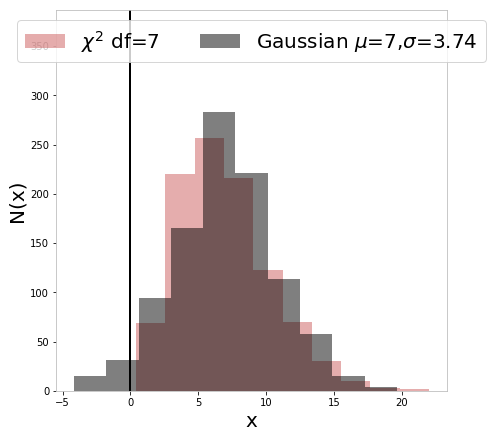

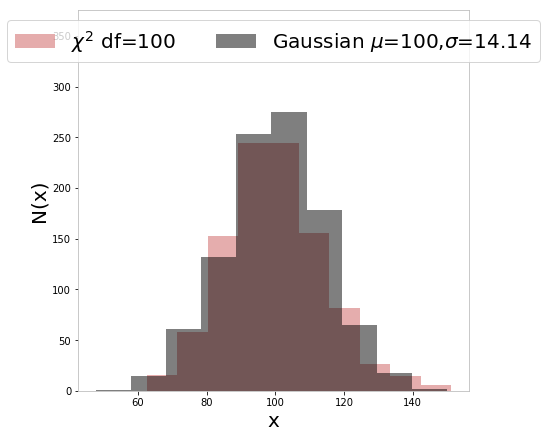

In [15]:
for df in [2,7,100]:
    fig=pl.figure(figsize=(7,7))
    ax=fig.add_subplot(111)
    ax.hist(np.random.chisquare(df,N),color='IndianRed', alpha = 0.5, label=r'$\chi^2$ df=%g'%(df))
    ax.hist(np.random.normal(df,np.sqrt(2*df),N), color='black', alpha = 0.5, label=r'Gaussian $\mu$=%g,$\sigma$=%.2f'%(df, np.sqrt(2*df)))
    ax.set_ylim(ax.get_ylim()[0],ax.get_ylim()[1]*1.3)
    if not df==100:
        ax.plot([0,0],ax.get_ylim(),'k-')
    ax.legend(fontsize=20, ncol=2, loc=9)
    ax.set_xlabel('x')
    ax.set_ylabel('N(x)')

# Uniform distribution: $N$


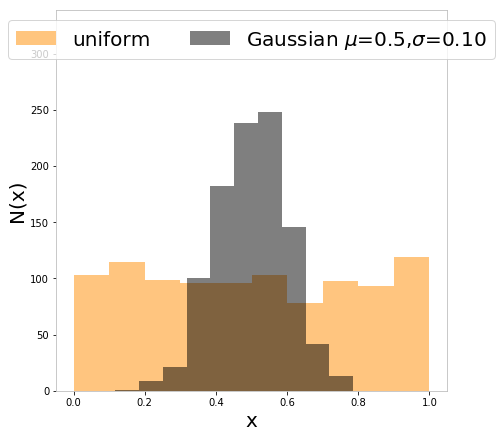

In [16]:
fig=pl.figure(figsize=(7,7))
ax=fig.add_subplot(111)
ax.hist(np.random.rand(N),color='DarkOrange', alpha = 0.5, label=r'uniform')
ax.hist(np.random.normal(0.5,0.1,N), color='black', alpha = 0.5, label=r'Gaussian $\mu$=%g,$\sigma$=%.2f'%(0.5, 0.1))
ax.set_ylim(ax.get_ylim()[0],ax.get_ylim()[1]*1.3)
ax.legend(fontsize=20, ncol=2, loc=9)
ax.set_xlabel('x')
ax.set_ylabel('N(x)')